In [1]:
import numpy as np
from scipy.stats import norm, gamma
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.style.use("ggplot")
np.random.seed(123)

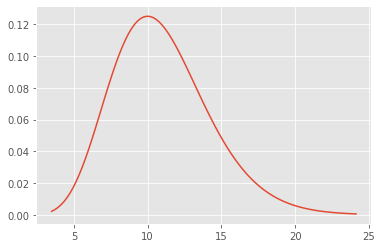

In [3]:
k = 11
lam = 1
x = np.linspace(gamma.ppf(0.001,k), gamma.ppf(0.999,k),100)
plt.plot(x, gamma.pdf(x, k, scale=1/lam));

# ガンマ分布

In [4]:
f = lambda x, lam, k : -lam + (k-1) / x  # ガンマ分布の傾き

In [5]:
# leap-flog
def leap_flog(q,p,eps,lam,k,f):
    p_new = p + 0.5 * eps * f(q, lam, k)
    q_new = q + eps * p_new
    p_new = p_new + 0.5 * eps * f(q_new,lam, k)
    q, p = q_new, p_new
    return q, p

### ハミルトニアン（ハミルトン式）
$H = \frac{1}{2} p^2 - (k-1)\log\theta + \lambda \theta$

/tmp/ipykernel_77/2933449816.py:29: RuntimeWarning: divide by zero encountered in log
  CS = plt.contour(X, Y, 0.5 * Y ** 2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])
/tmp/ipykernel_77/2933449816.py:35: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


accept ratio:  1.0


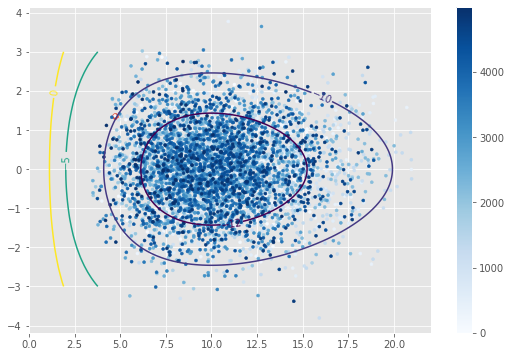

In [10]:
eps = 1e-2  #  0.01 時間刻み
q, p = 4.0, 0.0
L = 100  # L回遷移させる
NMCS = 10000
warmup = 5000

lf_arr = np.zeros([NMCS,2])  # p,q の２つ
n_accept = 0

for mcs in range(NMCS):
    hamiltonian_c = 0.5 * p ** 2 + lam * q - (k-1) * np.log(q)  # ハミルトン式
    q_c, p_c = q, p 
    for i in range(L):
        q_c, p_c = leap_flog(q_c, p_c, eps, lam, k, f)
    hamiltonian_new = 0.5 * p_c ** 2 + lam * q_c - (k-1) * np.log(q_c)
    if np.random.rand() < np.exp(hamiltonian_c - hamiltonian_new):
        q, p = q_c, p_c
        hamiltonian_c = hamiltonian_new
        n_accept += 1
    lf_arr[mcs,:] = q,p
    p = norm.rvs()

df = pd.DataFrame(lf_arr[:warmup], columns=["q","p"])

plt.figure(figsize=(9,6))

x, y = np.linspace(0, 20, 100), np.linspace(-3,3, 100)
X, Y = np.meshgrid(x,y)
CS = plt.contour(X, Y, 0.5 * Y ** 2 - (k-1)*np.log(X) + lam * X, levels = [-12, -10, -5, 0])
plt.clabel(CS, inline=1, fontsize=10)

plt.scatter(df["q"][0],df["p"][0])  # 出発点
plt.scatter(df["q"],df["p"], marker=".", c = df.index, cmap="Blues")  # "c="　カラー指定

plt.colorbar();

print("accept ratio: ", n_accept / NMCS)

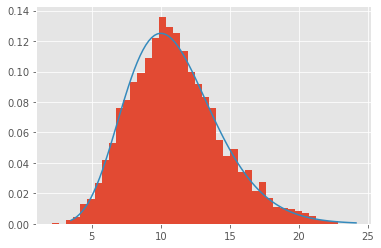

In [7]:
df["q"].hist(density=True, bins=40)
x = np.linspace(gamma.ppf(0.001,k), gamma.ppf(0.999,k),100)
plt.plot(x, gamma.pdf(x, k, scale=1/lam));